I think I've done this tutorial before but I wasn't ready for it. It's time to fucking learn.

# Coin Toss

Coin tosses are the first project here. Statistics loves coins.

30 coin flips 

We have to make a hypothesis or two.

**First hypothesis:** 50/50- There will be 15 heads and 15 tails.
**Second hypothesis:** 29 heads, 1 tail.

**what is the probablility of getting 24 heads in 30 tosses?**

it is the probability of getting heads 24 times or more (not sure what this statement means, let's keep going)

**hacker approach**

run experiment 100,000 times, find the percentage of times the experiment returned 24 or more heads. 

In [1]:
import numpy as np

total_tosses = 30
num_heads = 24
prob_head = 0.5

# 0 is tail. 1 is heads. Generates one experiment.

experiment = np.random.randint(0,2,total_tosses)
print("Data of the Experiment: ", experiment)

# find number of heads

print("Heads in the Experiment: ", experiment[experiment==1]) # This will give all the heads in the array

head_count = experiment[experiment==1].shape[0] # This will get the count of heads in the array

print("Number of heads in the experiment: ", head_count)



Data of the Experiment:  [1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0]
Heads in the Experiment:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Number of heads in the experiment:  15


(verbatim) Now the above experiment needs to repeated 100 times. Let's write a function and put the above code in a loop

In [9]:
def coin_toss_experiment(times_to_repeat):
    
    head_count = np.empty([times_to_repeat,1], dtype=int)
    
    for times in np.arange(times_to_repeat):
        experiment = np.random.randint(0,2,total_tosses)
        head_count[times] = experiment[experiment==1].shape[0]
        
    return head_count

In [10]:
head_count = coin_toss_experiment(100)

In [11]:
head_count[:10]

array([[19],
       [15],
       [15],
       [14],
       [14],
       [19],
       [16],
       [13],
       [13],
       [ 9]])

In [12]:
print("Dimensions:", head_count.shape, "\n","Type of object: ", type(head_count))

Dimensions: (100, 1) 
 Type of object:  <class 'numpy.ndarray'>


Time to plot it and make it easy to understand.

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)

/home/christopher/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


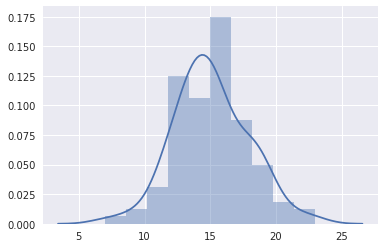

In [16]:
sns.distplot(head_count, kde=True)

/home/christopher/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


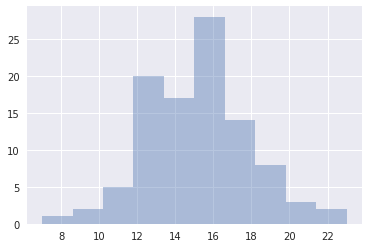

In [18]:
sns.distplot(head_count, kde=False)

Number of times the experiement returned 24 heads

In [19]:
head_count[head_count>=24]

array([], dtype=int64)

In [20]:
print("Number of times experiment returned 24 heads or more: ", head_count[head_count>=24].shape[0])
print("\n")
print("Percentage of times with 24 or more heads: ", head_count[head_count>=24].shape[0]/float(head_count.shape[0]))

Number of times experiment returned 24 heads or more:  0


Percentage of times with 24 or more heads:  0.0


So far, it looks like the coin is fair. Now I have to repeat the experiment 100,000 times.

update on the function above before I do this. No `for` loop.

In [21]:
def coin_toss_experiment_2(times_to_repeat):
    
    head_count = np.empty([times_to_repeat,1], dtype=int)
    experiment = np.random.randint(0,2,[times_to_repeat,total_tosses])
    return experiment.sum(axis=1)

In [22]:
my_head_count = coin_toss_experiment_2(100000)

print("Dimensions ", my_head_count.shape, "\n", "Type of Object: ", type(my_head_count))

Dimensions  (100000,) 
 Type of Object:  <class 'numpy.ndarray'>


In [23]:
my_head_count[:10]

array([11, 13, 13, 17, 15, 14, 17, 20, 15, 13])

So intereseting part of the updated function, it throws everything into a row. It works for this experiment but it's worth noting.

/home/christopher/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


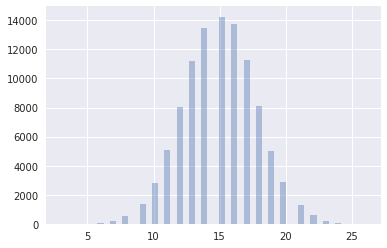

In [25]:
sns.distplot(my_head_count,kde=False)

/home/christopher/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


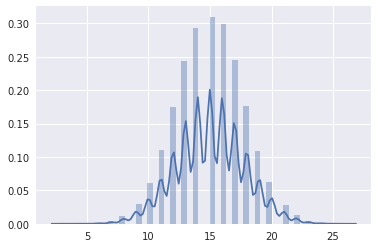

In [26]:
sns.distplot(my_head_count,kde=True)

In [28]:
print("Number of times experiment returned 24 heads or more: ", my_head_count[my_head_count>=24].shape[0])
print("\n")
print("Percentage of times with 24 or more heads: ", my_head_count[my_head_count>=24].shape[0]/float(my_head_count.shape[0]))

Number of times experiment returned 24 heads or more:  75


Percentage of times with 24 or more heads:  0.00075


From the last experiment with only 100 trials and it not having 24 heads in a row or more, it's easy to see why it might not happen in 100 trials. It's also easy to see why it could have happened 75 times in 100000 tosses. I think I will debate that the coin is a fair coin. 